# WP1 - Anomaly subgraph extraction: Finding anomalies

In [1]:
from importlib import reload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm
import networkx.algorithms.isomorphism as iso
import os

from anomaly_detection import detect_anomalies
import temporal_graph_generation as tgg
import correlation

In [2]:
os.getcwd()
os.chdir("../../overtime")
import overtime
os.chdir("../Spatio-Temporal-Graphs/src")

In [3]:
graph = nx.read_graphml("../data/causality_chi2.graphml")
graph = graph.to_undirected()

c:\Users\Andrea1\anaconda3\envs\SpaTemp\lib\site-packages\networkx\readwrite\graphml.py:1032: UserWarning: No key type for id id. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
c:\Users\Andrea1\anaconda3\envs\SpaTemp\lib\site-packages\networkx\readwrite\graphml.py:1032: UserWarning: No key type for id labels. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
c:\Users\Andrea1\anaconda3\envs\SpaTemp\lib\site-packages\networkx\readwrite\graphml.py:1032: UserWarning: No key type for id causal. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
c:\Users\Andrea1\anaconda3\envs\SpaTemp\lib\site-packages\networkx\readwrite\graphml.py:1032: UserWarning: No key type for id label. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")


In [4]:
graph = nx.convert_node_labels_to_integers(graph)

In [5]:
full_data = pd.read_csv('../data/loadtest-timestamp.csv')
full_data[['Date', 'Time']] = full_data['Time'].str.split(" ", expand=True)
full_data = full_data.sort_values(by=['Date','Time'])
full_data

,Unnamed: 0,Time,carts,carts-db,catalogue,catalogue-db,front-end,orders,orders-db,payment,queue-master,rabbitmq,session-db,shipping,user,user-db,Date
674,674,11:27,0.00245,0.00824,0.00129,0.001150,0.00313,0.00260,0.00901,0.001250,0.00254,0.0145,0.00232,0.00223,0.00178,0.00942,10/14/2021
675,675,11:28,0.00279,0.01020,0.00128,0.001080,0.00352,0.00273,0.00974,0.001310,0.00249,0.0136,0.00268,0.00235,0.00191,0.01060,10/14/2021
676,676,11:29,0.00345,0.00929,0.00140,0.001180,0.00379,0.00262,0.00938,0.001370,0.00329,0.0132,0.00260,0.00214,0.00198,0.01020,10/14/2021
677,677,11:30,0.00233,0.00890,0.00108,0.001120,0.00343,0.00227,0.00783,0.001300,0.00239,0.0113,0.00223,0.00221,0.00173,0.00869,10/14/2021
678,678,11:31,0.00421,0.00914,0.00148,0.001380,0.00405,0.00297,0.00980,0.001410,0.00250,0.0127,0.00259,0.00234,0.00233,0.01030,10/14/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,527,20:33,0.00312,0.01000,0.00139,0.000967,0.00300,0.00320,0.00924,0.001150,0.00214,0.0152,0.00238,0.00187,0.00234,0.00920,3/2/2022
528,528,20:34,0.00252,0.01080,0.00116,0.001060,0.00311,0.00259,0.01050,0.001480,0.00210,0.0118,0.00260,0.00220,0.00195,0.00965,3/2/2022
529,529,20:35,0.00311,0.01030,0.00134,0.001460,0.00366,0.00278,0.01060,0.001330,0.00222,0.0122,0.00247,0.00271,0.00237,0.01090,3/2/2022
530,530,20:36,0.00220,0.01030,0.00102,0.000994,0.00334,0.00458,0.00998,0.000969,0.00222,0.0128,0.00241,0.00213,0.00180,0.00955,3/2/2022


In [6]:
detect_anomalies(full_data, graph, ['2/17/2022', '3/2/2022'], ['10/14/2021', '10/19/2021', '10/20/2021'])

Node names from data csv:  ['carts', 'carts-db', 'catalogue', 'catalogue-db', 'front-end', 'orders', 'orders-db', 'payment', 'queue-master', 'rabbitmq', 'session-db', 'shipping', 'user', 'user-db']
Node names from graph:  ['carts', 'carts-db', 'catalogue', 'catalogue-db', 'front-end', 'master', 'orders', 'orders-db', 'payment', 'queue-master', 'rabbitmq', 'session-db', 'shipping', 'user', 'user-db', 'worker1', 'worker2']
Nodes in graph but not in data csv:  ['master', 'worker1', 'worker2']
Nodes in data csv but not in graph:  []


100%|██████████| 589/589 [00:00<00:00, 2856.24it/s]

Traceback (most recent call last):
  File "c:\Users\Andrea1\Documents\HPI\MLGraphs\Spatio-Temporal-Graphs\src\anomaly_detection.py", line 28, in detect_anomalies
    s.initialize(verbose=False) 		# initialization step
  File "c:\Users\Andrea1\Documents\HPI\MLGraphs\Spatio-Temporal-Graphs\src\spot.py", line 199, in initialize
    g,s,l = self._grimshaw()
  File "c:\Users\Andrea1\Documents\HPI\MLGraphs\Spatio-Temporal-Graphs\src\spot.py", line 345, in _grimshaw
    right_zeros = SPOT._rootsFinder(lambda t: w(self.peaks,t),
  File "c:\Users\Andrea1\Documents\HPI\MLGraphs\Spatio-Temporal-Graphs\src\spot.py", line 238, in _rootsFinder
    X0 = np.arange(bounds[0]+step,bounds[1],step)
ValueError: arange: cannot compute length




c:\Users\Andrea1\Documents\HPI\MLGraphs\Spatio-Temporal-Graphs\src\spot.py:238: RuntimeWarning: invalid value encountered in double_scalars
  X0 = np.arange(bounds[0]+step,bounds[1],step)


In [7]:
remove_edges = [e for e in graph.edges(data=True) if e[2].get('causal')!='true']
graph.remove_edges_from(remove_edges)


In [8]:
frontend_node = [n for n in graph.nodes.data() if n[1]["id"] == "front-end"][0]

### Sample subgraph with dfs/bfs tree combination

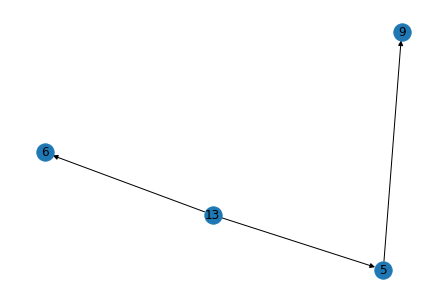

In [22]:
MAXLAG = 2
DATETIME_FORMAT = "%m/%d/%Y %H:%M"

tg= sample_subgraph_with_timestamp_constraint(graph, frontend_node[0], bfs_prob=0.5, random_seed=111, start_timestamp='3/2/2022 13:22', datetime_format=DATETIME_FORMAT, maxlag=MAXLAG)
nx.draw(tg, with_labels=True)

In [10]:
np.random.seed(111)
tn_subgraphs = []
em = iso.numerical_edge_match("timestep", 0)
for seed in tqdm(np.random.choice(10000000, 1000)):
    for max_nodes_no in range(2, len(graph.nodes()) + 1):
        for bfs_prob in [0.1, 0.5, 0.9]:
            tn_subgraph = tgg.sample_subgraph(graph, frontend_node[0], max_nodes=max_nodes_no, bfs_prob=bfs_prob, random_seed=seed)
            tgg.add_timesteps_to_graph(tn_subgraph, frontend_node[0], random_seed=seed)
            if tn_subgraphs:
                if not np.any([nx.is_isomorphic(tn_subgraph, s, edge_match=em) for s in tn_subgraphs]):
                    tn_subgraphs.append(tn_subgraph)
            else:
                tn_subgraphs.append(tn_subgraph)

  2%|▏         | 181/10000 [04:48<4:21:15,  1.60s/it]


KeyboardInterrupt: 

In [7]:
np.save('../data/apg_unique_subgraphs_temporal_node2-6.npy', correlation.encode_temporal_graphs(tn_subgraphs))

NameError: name 'tn_subgraphs' is not defined

In [54]:
len(tn_subgraphs)

44

In [4]:
read_apg = correlation.decode_temporal_graphs(np.load('../data/apg_unique_subgraphs_temporal_node2-6.npy'))

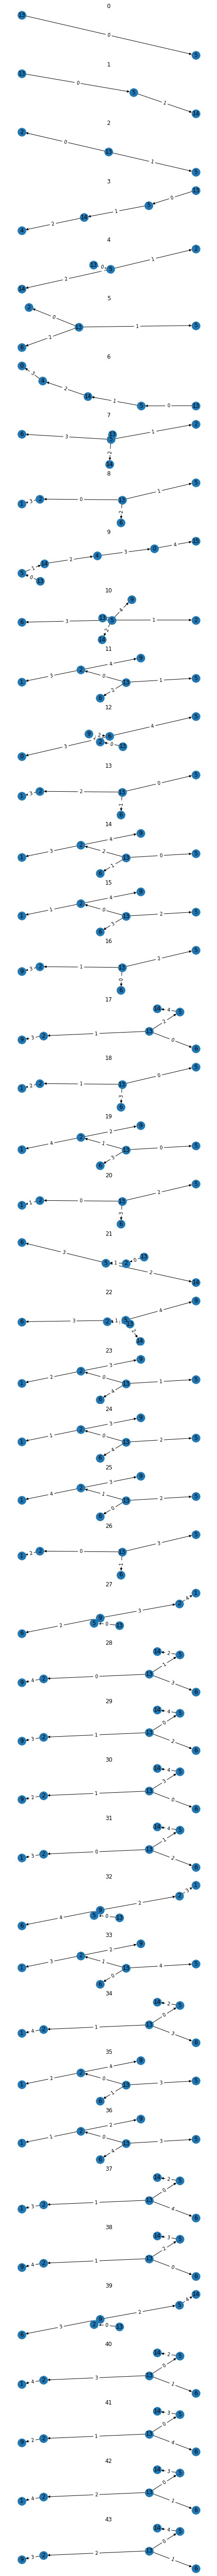

In [32]:
fig, axes = plt.subplots(44, 1, figsize=(8,100))
for i, subgraph in enumerate(read_apg):
    nx.draw(subgraph, nx.spring_layout(subgraph, seed=7), with_labels=True, ax=axes[i])
    axes[i].set_title(i)
    edge_labels = nx.get_edge_attributes(subgraph, "timestep")
    nx.draw_networkx_edge_labels(subgraph, nx.spring_layout(subgraph, seed=7), edge_labels, ax=axes[i])

### Test temporal centralities

In [5]:
subgraph = read_apg[1]

In [8]:
edge_df = nx.to_pandas_edgelist(subgraph)
max_time = np.max(edge_df['timestep'])

temporal_network = overtime.TemporalDiGraph("test_network")
for node in subgraph.nodes():
    temporal_network.add_node(node)
for _, edge in edge_df.iterrows():
    temporal_network.add_edge(str(edge["source"]), str(edge["target"]), edge["timestep"] + 1, max_time + 2)

In [9]:
edge_df

,source,target,timestep
0,13,5,0
1,5,14,1


In [10]:
tc_fastest = overtime.temporal_betweenness(temporal_network, optimality="shortest")

In [11]:
tc_fastest

{'13': 0.0, '14': 0, '5': 1.0}

In [9]:
subgraph = tgg.sample_subgraph(graph, frontend_node[0], bfs_prob=0.5, random_seed=111)

In [10]:
tgg.add_timesteps_to_graph(subgraph, frontend_node[0], random_seed=666)

In [52]:
temporal_network.edges.labels()

['13-2', '13-5', '13-6', '2-1']

In [ ]:
labels = []
for t in range(temporal_network.edges.start(), temporal_network.edges.end()):
    print(t)
    figure, axes = plt.subplots(1)
    labels.append('examples/time_' + str(t) + '.png')
    print(temporal_network.get_snapshot(t))
    overtime.plots.circle.Circle(temporal_network.get_snapshot(t), axes)

### Test and check temporal centralities for list of graphs

In [16]:
temporal_closeness_vectors = []
temporal_betweenness_vectors = []
for s in read_apg:

   
   edge_list = tgg.get_complete_teneto_edgelist(s)
   tnet = teneto.TemporalNetwork(from_df=edge_list)
   closeness_centrality =  teneto.networkmeasures.temporal_closeness_centrality(tnet=tnet)
   temporal_closeness_vectors.append(closeness_centrality)
   betweenness_centrality = teneto.networkmeasures.temporal_betweenness_centrality(tnet=tnet)
   temporal_betweenness_vectors.append(betweenness_centrality)

NameError: name 'teneto' is not defined

In [12]:
temporal_closeness_vectors_t = []
temporal_betweenness_vectors_t = []
for s in read_apg:
    edge_df = nx.to_pandas_edgelist(s)
    max_time = np.max(edge_df['timestep'])

    temporal_network = overtime.TemporalDiGraph("test_network")
    for node in s.nodes():
        temporal_network.add_node(node)
    for _, edge in edge_df.iterrows():
        temporal_network.add_edge(str(edge["source"]), str(edge["target"]), edge["timestep"] + 1, max_time + 2)

    closeness_centrality =  overtime.temporal_closeness(temporal_network, optimality="fastest")
    temporal_closeness_vectors_t.append(closeness_centrality)
    betweenness_centrality = overtime.temporal_betweenness(temporal_network, optimality="foremost")
    temporal_betweenness_vectors_t.append(betweenness_centrality)


In [13]:
print(temporal_closeness_vectors_t[8])
print(temporal_closeness_vectors_t[13])
print(temporal_closeness_vectors_t[16])

{'1': 0.0, '13': 1.3333333333333333, '5': 0.0, '6': 0.0, '2': 1.0}
{'1': 0.0, '5': 0.0, '2': 1.0, '13': 1.5833333333333333, '6': 0.0}
{'5': 0.0, '13': 1.4166666666666665, '2': 1.0, '6': 0.0, '9': 0.0}


In [14]:
print(temporal_betweenness_vectors_t[8])
print(temporal_betweenness_vectors_t[13])
print(temporal_betweenness_vectors_t[16])

{'1': 0, '13': 0.0, '5': 0, '6': 0, '2': 1.0}
{'1': 0, '5': 0, '2': 1.0, '13': 0.0, '6': 0}
{'5': 0, '13': 0.0, '2': 1.0, '6': 0, '9': 0}


In [66]:
dupes = {}
for i, ar1 in enumerate(temporal_closeness_vectors):
    for j in range(i+1, len(temporal_closeness_vectors)):
        ar2 = temporal_closeness_vectors[j]
        if np.array_equal(ar1,ar2):
            if i in dupes.keys():
                dupes[i].append(j)
            else:
                dupes[i]=[j]

In [67]:
dupes

{8: [13, 16],
 11: [14, 25],
 13: [16],
 14: [25],
 17: [29, 31, 43],
 18: [26],
 29: [31, 43],
 31: [43],
 34: [40],
 38: [42]}

In [72]:
print(temporal_closeness_vectors[8])
print(temporal_closeness_vectors[13])
print(temporal_closeness_vectors[16])
print(temporal_closeness_vectors[26])

[0.         0.         0.03076923 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.21318681]
[0.         0.         0.03076923 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.21318681]
[0.         0.         0.03076923 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.21318681]
[0.         0.         0.04395604 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.21318681]


In [ ]:
np.save('temporal_betweenness_vectors.npy',temporal_betweenness_vectors)

In [15]:
np.save('temporal_closeness_vectors.npy',temporal_closeness_vectors)

/Users/lisa/opt/anaconda3/envs/graphs_ml/lib/python3.9/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [16]:
temporal_degree_vectors = []
for s in read_apg:
   edge_list = tgg.get_complete_teneto_edgelist(s)
   tnet = teneto.TemporalNetwork(from_df=edge_list)
   degree_centrality =  teneto.networkmeasures.temporal_degree_centrality(tnet=tnet)
   temporal_degree_vectors.append(degree_centrality)

In [17]:
temporal_degree_vectors

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 2., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 3., 1.]),
 array([0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 3., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6.]),
 array([0., 0., 0., 0., 1., 3., 0., 0., 0., 0., 0., 0., 0., 4., 2.]),
 array([0., 0., 0., 0., 0., 6., 0., 0., 0., 0., 0., 0., 0., 4., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 9.]),
 array([1., 0., 0., 0., 2., 4., 0., 0., 0., 0., 0., 0., 0., 5., 3., 0.]),
 array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         5.,  0.]),
 array([ 0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.]),
 array([0., 0., 4., 0., 0., 0., 3., 0., 0., 3., 0., 0., 0., 5.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 9.]),

In [90]:
temporal_closeness_vectors = np.load('../data/temporal_closeness_vectors.npy', allow_pickle=True)

### Check distances between the graphs

In [25]:
check_graphs = [(i,g1) for i, g1 in enumerate(read_apg)]
distances = {}
for i, g1 in check_graphs:
    for j, g2 in check_graphs:
        if i != j:
            dist = nx.graph_edit_distance(g1,g2)
            if (i,j) not in distances.keys() and (j,i) not in distances.keys():
                distances[(i,j)] = dist

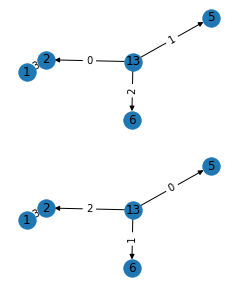

In [37]:
fig, axes = plt.subplots(2, 1, figsize=(4,5))
for i, subgraph in enumerate([read_apg[8], read_apg[13]]):
    nx.draw(subgraph, nx.spring_layout(subgraph, seed=7), with_labels=True, ax=axes[i])
    edge_labels = nx.get_edge_attributes(subgraph, "timestep")
    nx.draw_networkx_edge_labels(subgraph, nx.spring_layout(subgraph, seed=7), edge_labels, ax=axes[i])

### Check distance between TCM vectors with cosine similarity
Return each the indices of the Top 5 most similar graphs

In [94]:
#pad arrays for constant length
max_len = max([len(vec) for vec in temporal_closeness_vectors])
temporal_closeness_vectors = [np.concatenate([vec, np.zeros(max_len - len(vec))]) for vec in temporal_closeness_vectors]

In [125]:
from scipy import spatial

cosine_sim = {}
for i, ar1 in enumerate(temporal_closeness_vectors):
    for j in range(i+1, len(temporal_closeness_vectors)):
        ar2 = temporal_closeness_vectors[j]
        result = 1 - spatial.distance.cosine(ar1, ar2)
        if i in cosine_sim.keys():
            cosine_sim[i].append((j, result))
        else:
            cosine_sim[i]=[(j, result)]

In [128]:
for k, value in cosine_sim.items():
    value.sort(key=lambda x:x[1], reverse=True)
    cosine_sim[k] = value[:5]

In [129]:
cosine_sim

{0: [(2, 1),
  (5, 1),
  (8, 0.9897443919913853),
  (13, 0.9897443919913853),
  (16, 0.9897443919913853)],
 1: [(4, 0.9919979117236188),
  (7, 0.9823385664224746),
  (28, 0.9769931873472252),
  (34, 0.9769931873472252),
  (40, 0.9769931873472252)],
 2: [(5, 0.9999999999999998),
  (8, 0.9897443919913853),
  (13, 0.9897443919913853),
  (16, 0.9897443919913853),
  (17, 0.9852573025955326)],
 3: [(6, 0.9869841683592004),
  (4, 0.9816498172140428),
  (7, 0.9797861657326952),
  (10, 0.9769201488479284),
  (9, 0.9641764652156084)],
 4: [(7, 0.9981015108965875),
  (10, 0.9951819189662386),
  (6, 0.9507821755266384),
  (28, 0.9454140382968018),
  (34, 0.9454140382968018)],
 5: [(8, 0.9897443919913852),
  (13, 0.9897443919913852),
  (16, 0.9897443919913852),
  (17, 0.9852573025955327),
  (29, 0.9852573025955327)],
 6: [(9, 0.9924026867717431),
  (7, 0.9525906585118354),
  (10, 0.9519536083619624),
  (27, 0.8934574210041386),
  (32, 0.8910555465729106)],
 7: [(10, 0.9993312445968467),
  (27, 0.93

### Check anomaly timestamps

In [23]:
print(frontend_node[1]["anomaly_timestamps"])

['3/2/2022 11:50', '3/2/2022 13:22', '3/2/2022 15:47', '3/2/2022 17:48']


In [24]:
print([graph.nodes[node] for node in list(graph.neighbors(frontend_node[0]))])

[{'labels': ':Node', 'id': 'user-db'}, {'labels': ':Node', 'id': 'orders-db', 'anomaly': True, 'anomaly_timestamps': ['3/2/2022 12:13', '3/2/2022 13:22', '3/2/2022 13:23', '3/2/2022 17:39', '3/2/2022 19:41']}, {'labels': ':Node', 'id': 'carts-db', 'anomaly': True, 'anomaly_timestamps': ['3/2/2022 13:22', '3/2/2022 13:23']}]
